## Decision Tree Classifier

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn import tree
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [2]:
with open("spambase.names") as spam:
    text = spam.read()
    labels = re.findall(r'\n(\w*_?\W?):', text)
#labels.append('Class')
Data_set = pd.read_csv("spambase.data", header=None, names=labels +['spam']) 
# spam = spamData.pop('spam')
Data_array=Data_set.values
# print(Data_array)

In [3]:
Data_set.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [4]:
print("Number of rows before preprocessing : ", len(Data_set))

Number of rows before preprocessing :  4601


Boxplot of spam no spam email

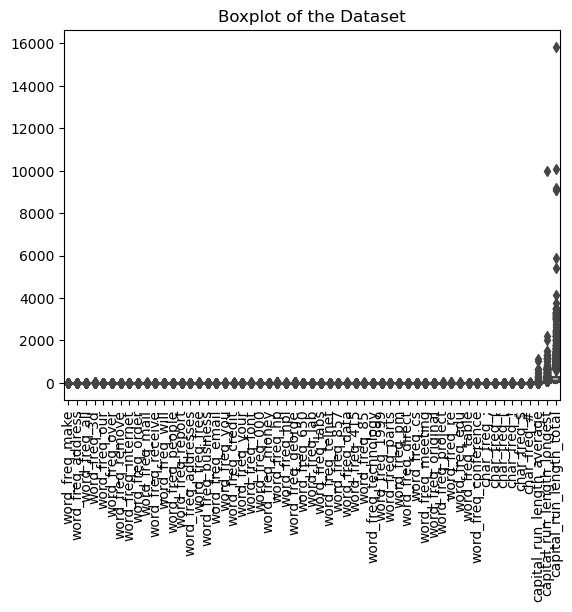

In [38]:
sns.boxplot(data=Data_set.iloc[:, :-1])
plt.xticks(rotation=90)
plt.title("Boxplot of the Dataset")
plt.show()

Individual box plots of the above columns before removing the outliers

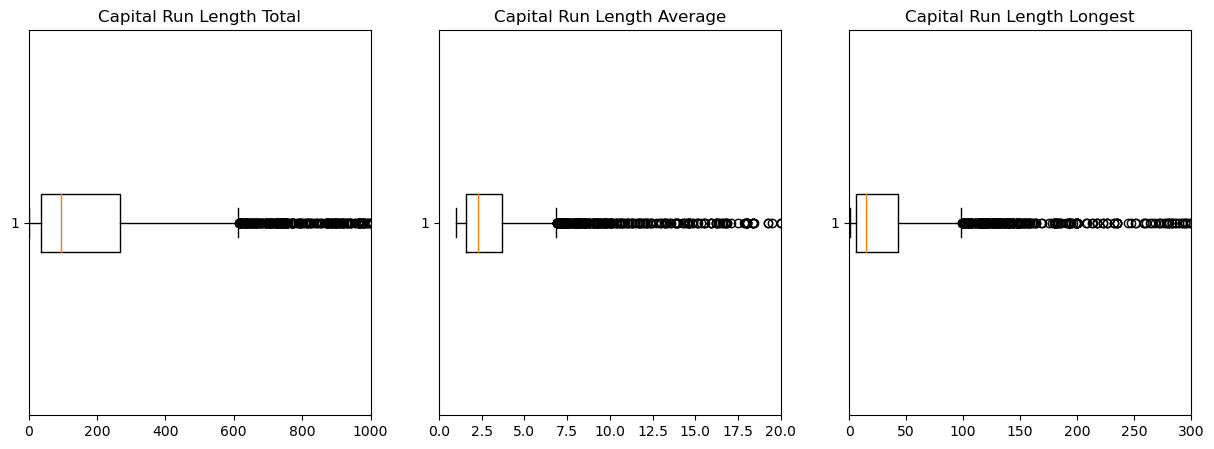

In [6]:
import matplotlib.pyplot as plt

# Create individual box plots for the columns with outliers
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].boxplot(Data_set['capital_run_length_total'], vert=False)
axs[0].set_title('Capital Run Length Total')
axs[0].set_xlabel('')
axs[0].set_xlim([0, 1000])

axs[1].boxplot(Data_set['capital_run_length_average'], vert=False)
axs[1].set_title('Capital Run Length Average')
axs[1].set_xlabel('')
axs[1].set_xlim([0, 20])

axs[2].boxplot(Data_set['capital_run_length_longest'], vert=False)
axs[2].set_title('Capital Run Length Longest')
axs[2].set_xlabel('')
axs[2].set_xlim([0, 300])

plt.show()


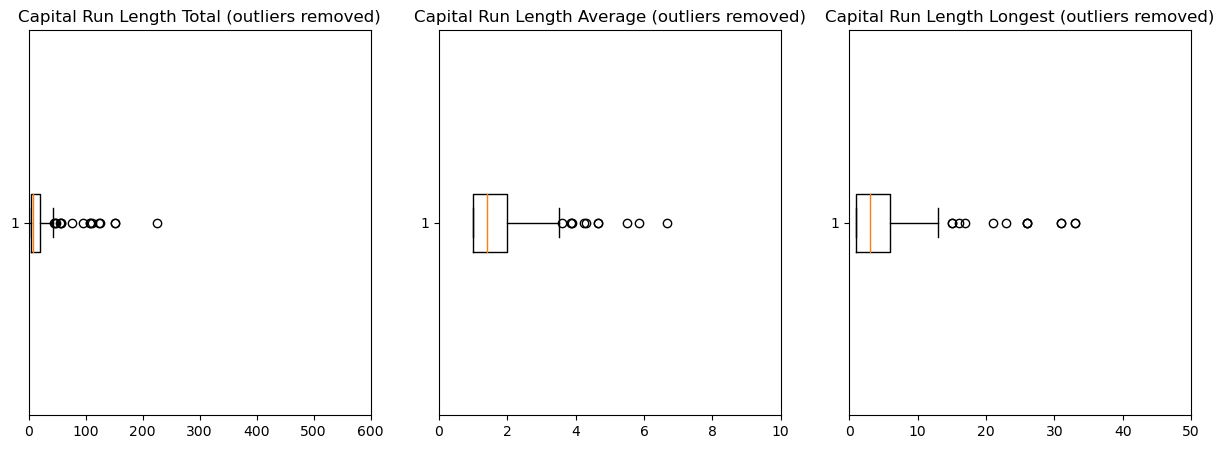

In [7]:
import numpy as np

# Calculate the interquartile range for each column
Q1 = Data_set.quantile(0.25)
Q3 = Data_set.quantile(0.75)
IQR = Q3 - Q1

# Remove the outliers using the IQR method
Data_set_outliers_removed = Data_set[~((Data_set < (Q1 - 1.5 * IQR)) | (Data_set > (Q3 + 1.5 * IQR))).any(axis=1)]

# Create individual box plots for the columns with outliers removed
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].boxplot(Data_set_outliers_removed['capital_run_length_total'], vert=False)
axs[0].set_title('Capital Run Length Total (outliers removed)')
axs[0].set_xlabel('')
axs[0].set_xlim([0, 600])

axs[1].boxplot(Data_set_outliers_removed['capital_run_length_average'], vert=False)
axs[1].set_title('Capital Run Length Average (outliers removed)')
axs[1].set_xlabel('')
axs[1].set_xlim([0, 10])

axs[2].boxplot(Data_set_outliers_removed['capital_run_length_longest'], vert=False)
axs[2].set_title('Capital Run Length Longest (outliers removed)')
axs[2].set_xlabel('')
axs[2].set_xlim([0, 50])

plt.show()


getting the duplicates in the dataset

In [8]:
Data_set.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
4596    False
4597    False
4598    False
4599    False
4600    False
Length: 4601, dtype: bool

removing the duplicate values

In [9]:
Data_set.drop_duplicates(inplace=True)

In [10]:
print("Number of rows after removing duplicates : ", len(Data_set))

Number of rows after removing duplicates :  4210


All null values in the dataset

individual box plots of the above columns before removing the outliers

In [11]:
Data_set.isna().sum()

word_freq_make                0
word_freq_address             0
word_freq_all                 0
word_freq_3d                  0
word_freq_our                 0
word_freq_over                0
word_freq_remove              0
word_freq_internet            0
word_freq_order               0
word_freq_mail                0
word_freq_receive             0
word_freq_will                0
word_freq_people              0
word_freq_report              0
word_freq_addresses           0
word_freq_free                0
word_freq_business            0
word_freq_email               0
word_freq_you                 0
word_freq_credit              0
word_freq_your                0
word_freq_font                0
word_freq_000                 0
word_freq_money               0
word_freq_hp                  0
word_freq_hpl                 0
word_freq_george              0
word_freq_650                 0
word_freq_lab                 0
word_freq_labs                0
word_freq_telnet              0
word_fre

Removing the target column 

In [12]:
data=Data_set.drop(labels=['spam'], axis=1)
data.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191


In [13]:
print("Number of rows after preprocessing : ", len(Data_set))

Number of rows after preprocessing :  4210


Summary of dataset before performing Standard Scaler

In [14]:
data.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.034746,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.298521,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,10.000000,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000


 Box plot before scaling


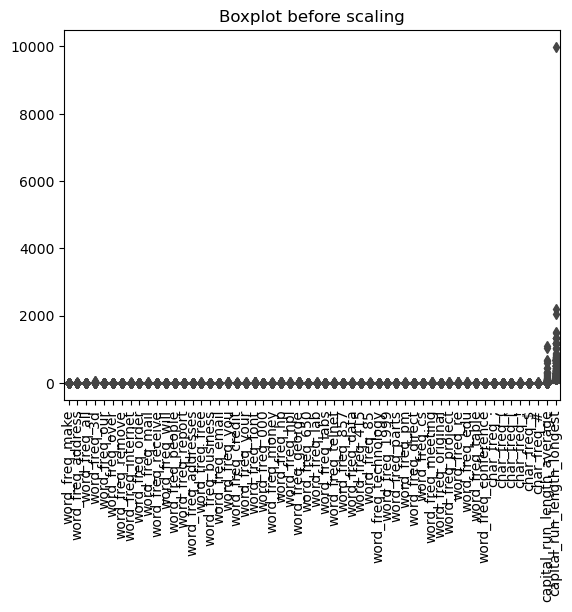

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(data=data.iloc[:, :-1])
plt.xticks(rotation=90)
plt.title("Boxplot before scaling")

# Save the plot as a PNG file
plt.savefig('boxplot_before_scaling.png')


Standard Scaling for the dataset

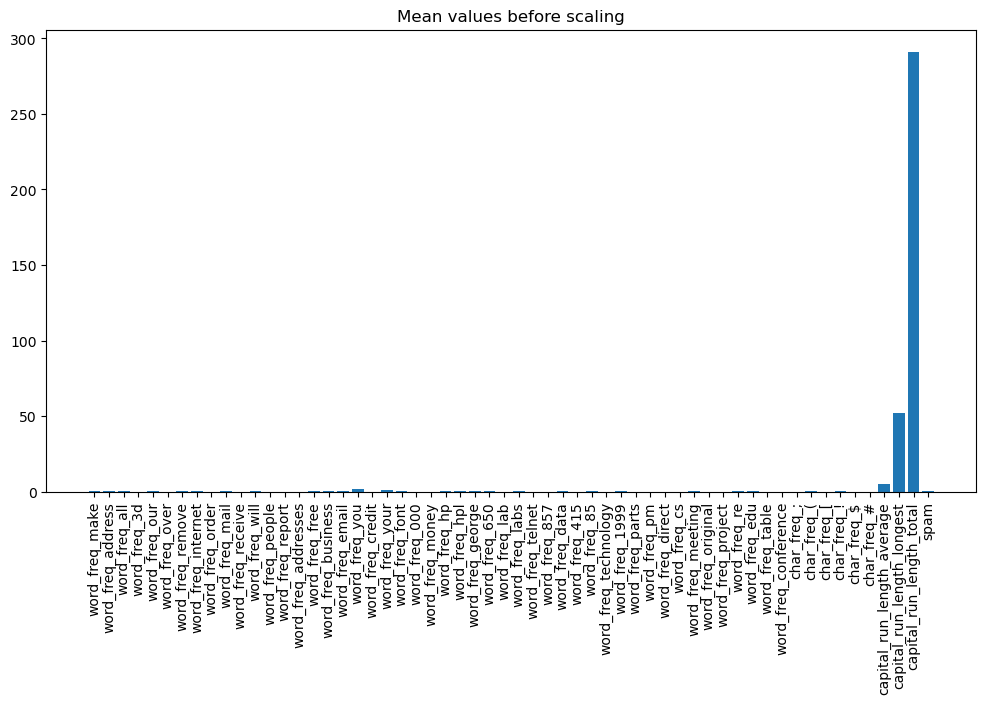

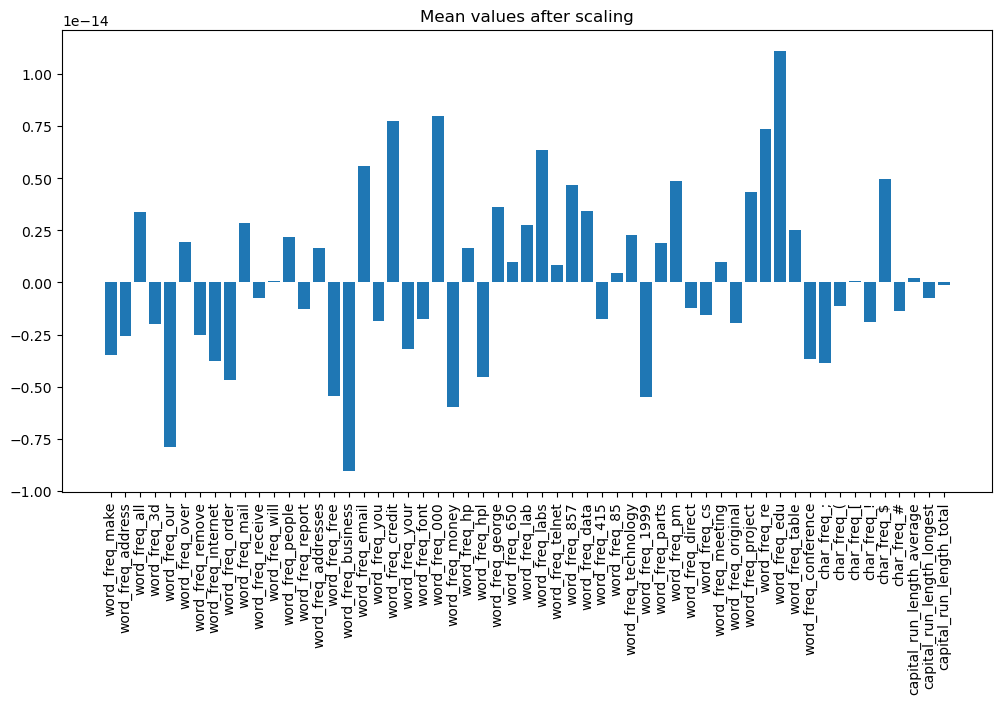

<Figure size 640x480 with 0 Axes>

In [16]:
# Compute mean values before scaling
mean_before = Data_set.mean()

# Create a bar plot of mean values before scaling
plt.figure(figsize=(12, 6))
plt.bar(mean_before.index, mean_before.values)
plt.xticks(rotation=90)
plt.title('Mean values before scaling')

# Perform Standard Scaling on the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(Data_set.iloc[:, :-1])
Data_scaled = pd.DataFrame(data=scaled_data, columns=Data_set.columns[:-1])

# Compute mean values after scaling
mean_after = Data_scaled.mean()

# Create a bar plot of mean values after scaling
plt.figure(figsize=(12, 6))
plt.bar(mean_after.index, mean_after.values)
plt.xticks(rotation=90)
plt.title('Mean values after scaling')

plt.show()
plt.savefig('boxplot_before_scaling.png')

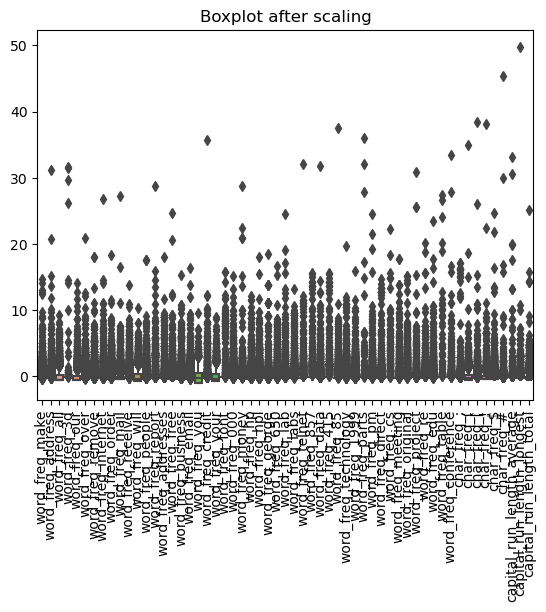

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create box plot after scaling
plt.xticks(rotation=90)
plt.title("Boxplot after scaling")


sns.boxplot(data=Data_scaled, orient='v')
plt.show()


Summmary of dataset after performing Standard Scaling

In [18]:
Data_set.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
count,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,...,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000,4210.000000
mean,0.104366,0.112656,0.291473,0.063078,0.325321,0.096656,0.117475,0.108000,0.091860,0.248420,...,0.040403,0.144048,0.017376,0.281136,0.076057,0.045798,5.383896,52.139905,291.181948,0.398812
std,0.300005,0.454260,0.515719,1.352487,0.687805,0.276030,0.397284,0.410282,0.282144,0.656638,...,0.252533,0.274256,0.105731,0.843321,0.239708,0.435925,33.147358,199.582168,618.654838,0.489712
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.627500,7.000000,40.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.073000,0.000000,0.016000,0.000000,0.000000,2.297000,15.000000,101.500000,0.000000
75%,0.000000,0.000000,0.440000,0.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.190000,...,0.000000,0.194000,0.000000,0.331000,0.053000,0.000000,3.706750,44.000000,273.750000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


Performing PCA to the Dataset

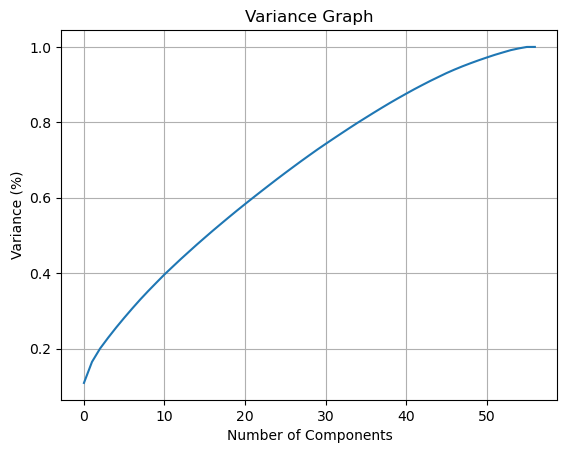

In [19]:
pca = PCA()

principalComponents = pca.fit_transform(Data_scaled)

plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)') #for each component

plt.title('Variance Graph')
plt.grid(True)
plt.show()

introducing the PCA components

In [20]:
pca = PCA(n_components=44)
new_data = pca.fit_transform(Data_set)

# The new data fed to the algorithm.
principal_Df = pd.DataFrame(data = new_data, columns = [
    'PC1', 'PC2','PC3','PC4','PC5','PC6','PC7','PC8','PC9','PC10',
    'PC11','PC12','PC13','PC14','PC15','PC16','PC17','PC18','PC19','PC20',
    'PC21', 'PC22','PC23','PC24','PC25','PC26','PC27','PC28','PC29','PC30',
    'PC31','PC32','PC33','PC34','PC35','PC36','PC37','PC38','PC39','PC40',
    'PC41','PC42','PC43','PC44'
])

After performing PCA

In [21]:
principal_Df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44
0,-11.600867,10.681086,-2.501893,-0.869408,-0.109859,-0.308880,-0.073019,-0.372983,-0.078201,-0.043234,...,0.072788,0.010944,-0.001236,-0.127775,-0.016267,-0.259689,0.382831,-0.122935,0.009282,-0.218560
1,735.050262,-70.631084,-1.008354,-1.880971,0.284652,0.984591,-0.044953,-0.352575,-0.164443,-0.207806,...,-0.124368,-0.017986,0.054384,0.029120,0.389964,0.070631,0.080410,0.019260,-0.009069,-0.123224
2,2011.760667,108.977053,-25.300089,0.056573,0.114224,-0.388979,-0.230035,0.102181,-0.464851,-0.144961,...,-0.298758,0.214005,-0.431906,0.063503,-0.455145,0.125258,-0.242798,0.306799,-0.314564,0.378471
3,-100.843430,4.030211,-1.237643,-1.448352,0.063128,0.388591,-0.033866,0.390501,0.071812,-0.638722,...,0.355590,-0.201991,0.075079,-0.047073,0.209036,-0.116119,0.217403,-0.122801,0.151446,0.076284
4,-100.843431,4.030209,-1.237640,-1.448248,0.063121,0.388520,-0.033853,0.390481,0.071855,-0.639019,...,0.355657,-0.201835,0.075148,-0.047068,0.209073,-0.116081,0.217596,-0.122698,0.151626,0.076348


In [22]:
pca.explained_variance_

array([3.92110279e+05, 3.07442791e+04, 8.11205632e+02, 4.40353214e+00,
       3.03307675e+00, 2.52852573e+00, 1.82952501e+00, 1.32886212e+00,
       1.16010815e+00, 1.04745671e+00, 8.95345908e-01, 8.15782925e-01,
       7.33788098e-01, 7.01100340e-01, 6.39257084e-01, 5.68741780e-01,
       4.95206534e-01, 4.42912923e-01, 4.28977088e-01, 4.04795308e-01,
       3.23677836e-01, 3.07510497e-01, 2.76897243e-01, 2.44003761e-01,
       2.26999405e-01, 2.06256509e-01, 1.95981025e-01, 1.83156372e-01,
       1.78779756e-01, 1.74426370e-01, 1.54561709e-01, 1.49771942e-01,
       1.43168518e-01, 1.31994873e-01, 1.27322045e-01, 1.25632939e-01,
       1.14909110e-01, 9.35885389e-02, 9.03466369e-02, 8.85989355e-02,
       8.38861294e-02, 7.96210631e-02, 7.71867261e-02, 7.09299442e-02])

In [23]:
pca.components_

array([[ 4.07630562e-05,  2.64809389e-05,  4.56728875e-05, ...,
         1.60777079e-01,  9.86942182e-01,  1.84869628e-04],
       [ 3.27258961e-05,  1.06526520e-04,  2.22424386e-04, ...,
         9.82711807e-01, -1.60993750e-01,  2.74039129e-04],
       [ 2.43812724e-04,  5.07644099e-05,  1.03398379e-03, ...,
        -9.17963714e-02,  5.09005720e-03,  3.84811310e-04],
       ...,
       [-5.43290415e-01,  4.66800167e-02, -1.39230362e-02, ...,
         3.07300050e-05,  2.75138410e-05, -2.26757946e-01],
       [ 6.03616358e-01,  1.73369075e-02, -2.06165343e-02, ...,
         1.00266720e-04, -2.76797269e-05,  1.61945322e-01],
       [-1.63589403e-01, -1.25833525e-02, -8.27727169e-03, ...,
        -4.88579469e-05, -3.27035187e-05, -1.56436258e-01]])

predictive model by appling K-Nearest Neighbors (KNN) algorithm

In [24]:
X = principal_Df.iloc[:,0:44].values
y = Data_set.iloc[:, 57].values

    Splitting the dataset into the Training set and Test set

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

Fitting classifier to the Training set

In [26]:
clf = DecisionTreeClassifier(random_state=0,criterion='gini')
clf.fit(X_train,y_train)

DecisionTreeClassifier(random_state=0)

checking Accuracy of testing dataset

In [27]:
predictions_test=clf.predict(X_test)
accuracy_score(y_test, predictions_test)

0.9560570071258907

Checking accuracy of training dataset


In [28]:
predictions_train = clf.predict(X_train)
accuracy_score(y_train,predictions_train)

1.0

Visualizing final decision tree


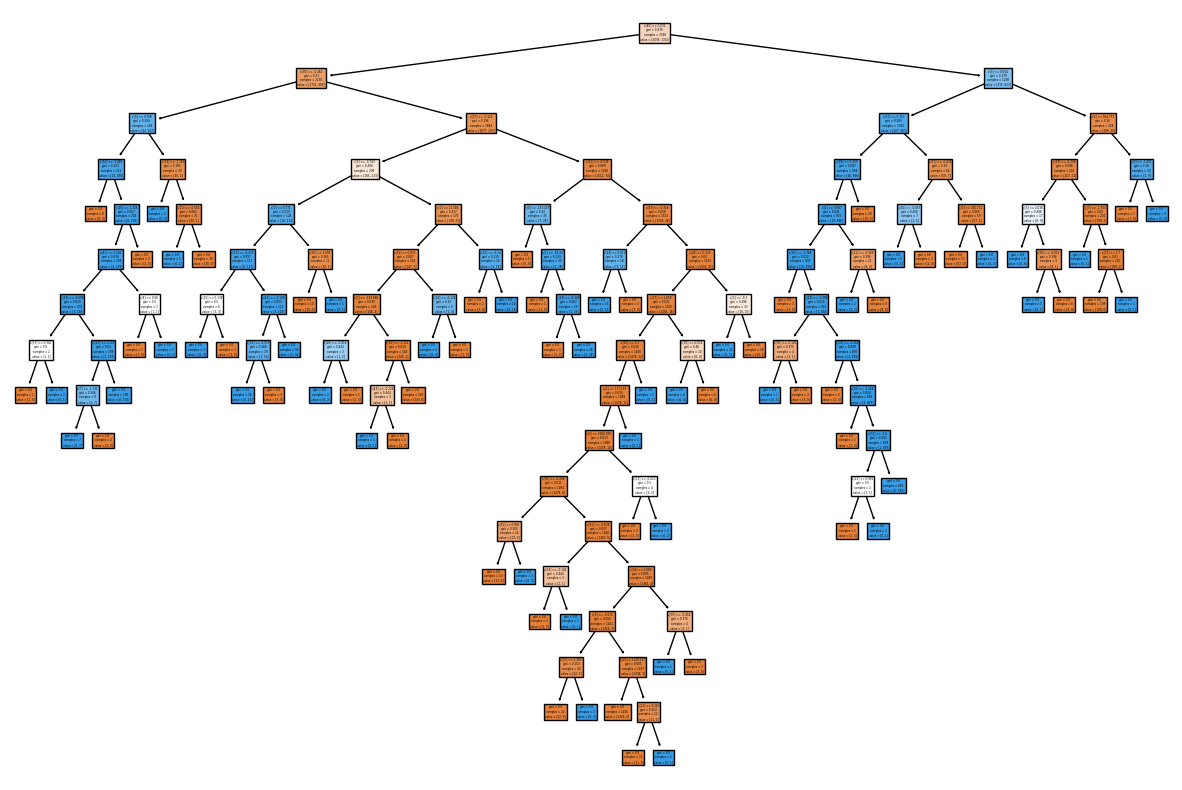

In [29]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

confusion matrix before pruning 

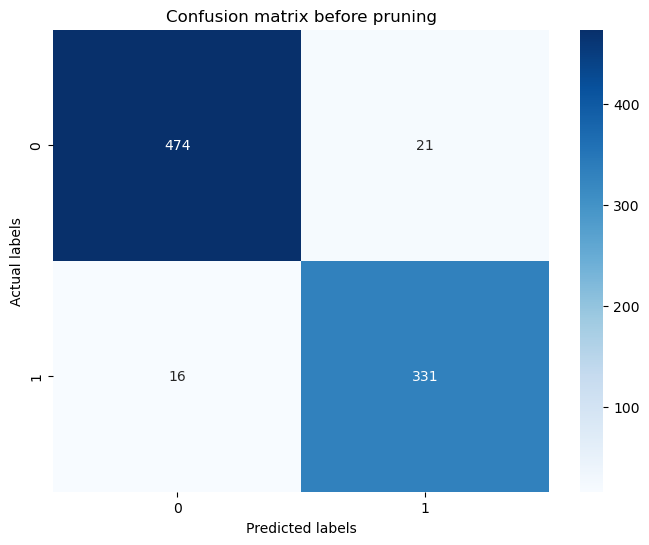

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained and tested your decision tree model, and have obtained the predicted labels and actual labels
predicted_labels = clf.predict(X_test)
cm = confusion_matrix(y_test, predicted_labels)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion matrix before pruning')
plt.show()

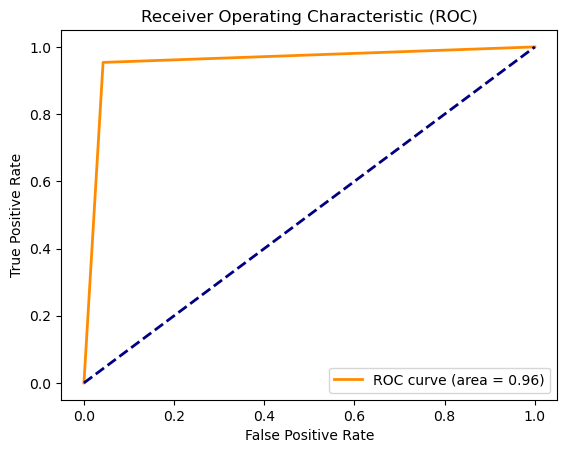

In [31]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have predicted scores or probabilities for binary classification
y_pred_scores = clf.predict_proba(X_test)[:,1]

# Calculate ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [42]:
roc_auc = auc(fpr, tpr)
print("AUC score: {:.2f}".format(roc_auc))


AUC score: 0.96


Pruning desision tree

In [32]:
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

Text(0.5, 1.0, 'Total Impurity vs effective alpha for training set')

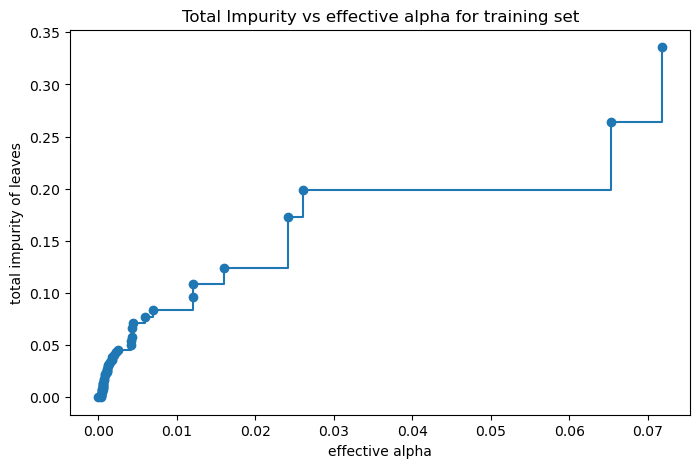

In [33]:
fig, ax = plt.subplots(figsize=(8,5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

In [34]:
clf = DecisionTreeClassifier(random_state=0, ccp_alpha=0.003)
clf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.003, random_state=0)

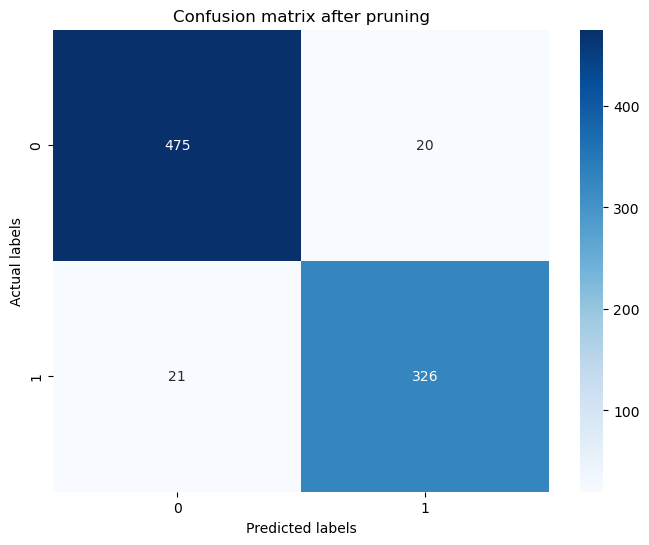

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Assuming you have already trained and tested your decision tree model, and have obtained the predicted labels and actual labels
predicted_labels = clf.predict(X_test)
cm = confusion_matrix(y_test, predicted_labels)

# Plotting the confusion matrix as a heatmap
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('Actual labels')
plt.title('Confusion matrix after pruning')
plt.show()

In [36]:
from sklearn.metrics import classification_report
predicted_labels = clf.predict(X_test)
classification_report = classification_report(y_test, predicted_labels)

print(classification_report)


              precision    recall  f1-score   support

           0       0.96      0.96      0.96       495
           1       0.94      0.94      0.94       347

    accuracy                           0.95       842
   macro avg       0.95      0.95      0.95       842
weighted avg       0.95      0.95      0.95       842



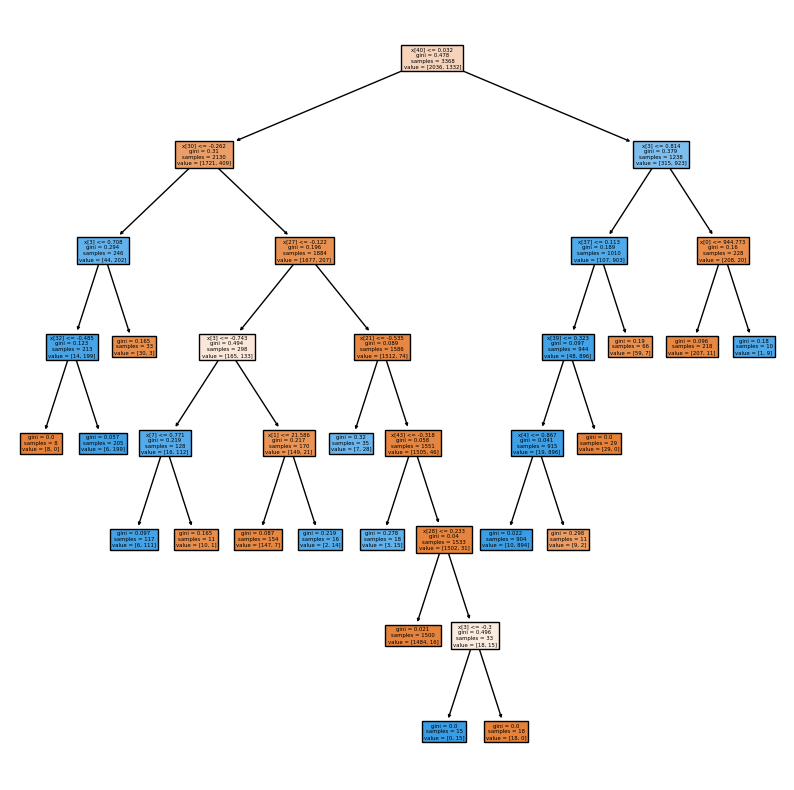

In [48]:
plt.figure(figsize=(10,10))
tree.plot_tree(clf,filled=True)
plt.show()